# Test of trial analyses API

In [2]:
%matplotlib inline
%load_ext autoreload
import numpy as np
from scipy.stats import ttest_ind, ttest_1samp
import pandas as pd
from importlib import reload
import time

import matplotlib.pyplot as plt
import seaborn as sns


import TreeMazeAnalyses2,Analyses.tree_maze_functions as tmf
import TreeMazeAnalyses2.Analyses.experiment_info as ei
import TreeMazeAnalyses2.Analyses.plot_functions as pf

import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual

from joblib import delayed, Parallel

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ei = reload(ei)
tmf = reload(tmf)
info = ei.SummaryInfo()

In [6]:
%%time
info.update_paths()

CPU times: user 42.2 s, sys: 2.31 s, total: 44.5 s
Wall time: 45.1 s


In [5]:
%%time
if 1:
    #info.run_analyses(which='pos_zones', task='T3', overwrite=True)
    #info.run_analyses(which='event_table', task='T3', overwrite=True)
    info.run_analyses(which='zone_rates_remap', task='T3', overwrite=True)

...........Analysis event_table did not find the dependent files.
.............Analysis event_table did not find the dependent files.
...............Analysis event_table did not find the dependent files.
...Analysis event_table did not find the dependent files.
..............Analysis event_table did not find the dependent files.
..Analysis event_table did not find the dependent files.
..Analysis event_table did not find the dependent files.
...........................Analysis event_table did not find the dependent files.
......Analysis event_table did not find the dependent files.
...........Analysis event_table did not find the dependent files.
......................................................Analysis event_table did not find the dependent files.
..............................................................Analysis event_table failed.
.....................Analysis zone_rates_comps did not find the dependent files.
.............Analysis zone_rates_comps did not find the dependent

In [22]:
analyses_table = info.get_analyses_table(overwrite=True)

In [24]:
%%time
ei = reload(ei)
info = ei.SummaryInfo()
zrc = info.get_zone_rates_comps(overwrite=True)

CPU times: user 8.16 s, sys: 40.2 ms, total: 8.2 s
Wall time: 8.25 s


In [25]:
need_to_rerun_sessions = zrc[~zrc['Even-Odd-Inwards_boot_corr_m'].isnull()].session.unique()
print(need_to_rerun_sessions)

[]


In [19]:
%autoreload 2

@interact_manual
def rerun_session(session=need_to_rerun_sessions):
    
    t0=time.time()
    subject = session.split("_")[0].capitalize()
    session_info = ei.SubjectSessionInfo(subject,session)
    
    _=session_info.get_zone_rates_comps(overwrite=True)
    print(f"Session {session} completed. Time {time.time()-t0:0.2f}s")
    

interactive(children=(Dropdown(description='session', options=('NE_T3g_052818', 'NE_T3g_053118', 'NE_T3g_06041…

In [12]:
session_info = ei.SubjectSessionInfo('Cl','Cl_T3i_021519')

In [17]:
tmf=reload(tmf)

In [26]:
%%time
b = tmf.BehaviorData(session_info, overwrite=True)

CPU times: user 2.03 s, sys: 20 ms, total: 2.05 s
Wall time: 2.07 s


In [18]:
%%time
ta = tmf.TrialAnalyses(session_info)

CPU times: user 22.7 s, sys: 380 ms, total: 23.1 s
Wall time: 2.88 s


In [14]:
a,b=session_info.get_pos_zones(return_invalid_pz=True)

In [16]:
b

array([], dtype=float64)

In [24]:
group_cond_sets = {'CR-CL': {'CR': ['Co', 'Inco'], 'CL': ['Co', 'Inco']},
                               'Co-Inco': {'Co':['CL', 'CR'], 'Inco': ['CR', 'CL']},
                               'CoSw-IncoSw': {'CoSw': ['CL', 'CR'], 'IncoSw':['CL', 'CR']},
                               'Rw': {'CL':['Co', 'Inco'], 'CR':['Co', 'Inco']},
                               'Even-Odd': {'Even': ['CL', 'CR'], 'Odd': ['CL', 'CR']},
                               'Even-Odd-In': {'Even': ['CL', 'CR'], 'Odd': ['CL', 'CR']}}
@interact(group = group_cond_sets.keys())
def n_cond_grup_trials(group):
    sets = ta.get_trials_boot_cond_set(group_cond_sets[group])
    
    n_cond_trials = [(cond, ts.shape[0]) for cond, ts in sets.items()]
    print(n_cond_trials)

interactive(children=(Dropdown(description='group', options=('CR-CL', 'Co-Inco', 'CoSw-IncoSw', 'Rw', 'Even-Od…

In [110]:
zrc['CR-CL_Even_Odd_t_var_ratio']=zrc['CR-CL_t_var']/zrc['Even-Odd_t_var']
zrc['CR-CL_Even_Odd_corr_diff']=zrc['CR-CL_corr']-zrc['Even-Odd_corr']

In [15]:
cols = zrc.columns[10:]

In [68]:
['a','b'] in ['a','b', 'c']

False

unit_id subject        session  session_pct_cov  session_valid  \
0        0      Li  Li_T3g_052818                0              0   
1        1      Li  Li_T3g_052818                0              0   
2        2      Li  Li_T3g_052918                0              0   
3        3      Li  Li_T3g_052918                0              0   
4        4      Li  Li_T3g_052918                0              0   

   session_unit_id unit_type tt tt_cl                        cl_name  ...  \
0                0       mua  2    11   Li_T3g_052818-tt2_d16.5_cl11  ...   
1                1       mua  2    14   Li_T3g_052818-tt2_d16.5_cl14  ...   
2                0      cell  2    18   Li_T3g_052918-tt2_d16.5_cl18  ...   
3                1      cell  8     0   Li_T3g_052918-tt8_d16.25_cl0  ...   
4                2      cell  8    12  Li_T3g_052918-tt8_d16.25_cl12  ...   

   Right_t_var  CoSw-IncoSw_corr  CoSw-IncoSw_t_m  CoSw-IncoSw_t_var  \
0     0.871039          0.287485         0.016101           0.779720   
1     1.532288          0.286413        -0.437282           1.442237   
2     1.521276          0.578947        -0.047527           1.232929   
3     1.115003          0.743148        -0.040255           0.539556   
4     1.433158          0.233785        -0.315928           0.585317   

   CR-CL_p_corr_m  Even-Odd_p_corr_m  CR-CL_Even-Odd_p_corr_z  CR-CL_b_corr_m  \
0             NaN                NaN                      NaN        0.204329   
1             NaN                NaN                      NaN        0.280072   
2        0.695331           0.695750                -0.008475        0.708394   
3        0.720006           0.710754                 0.084098        0.756727   
4        0.285440           0.379577                -0.390236        0.339260   

   Even-Odd_b_corr_m  CR-CL_Even-Odd_b_corr_z  
0           0.289892                -0.371387  
1           0.234822                 0.201529  
2           0.712335                -0.053806  
3           0.729913                 0.496898  
4           0.443347                -0.954136  

[5 rows x 37 columns]

In [16]:
@interact
def plot_zone_comps_measures(measure =cols):
    f,ax = plt.subplots(dpi=100)
    sns.stripplot(data=zrc, x = measure, y='unit_type', alpha=0.4, ax=ax)
    sns.boxplot(data=zrc, x = measure, y='unit_type', color='white', whis=np.inf, ax=ax)

interactive(children=(Dropdown(description='measure', options=('CR-CL_corr', 'CR-CL_t_m', 'CR-CL_t_var', 'Even…

In [17]:
@interact
def plot_zone_comps_compare_measures(measure1 = cols,
                                     measure2 =cols, ymax=[1,5,10],ymin=[-1,-5,-10]):
    #f,ax = plt.subplots(dpi=100)
    axs= sns.jointplot(data=zrc, x = measure1, y=measure2, hue='unit_type', alpha=0.2)
    axs.ax_marg_y.set_ylim(ymin, ymax)    
    print(zrc[[measure1,measure2]].corr(method='kendall').iloc[0,1])

interactive(children=(Dropdown(description='measure1', options=('CR-CL_corr', 'CR-CL_t_m', 'CR-CL_t_var', 'Eve…

In [129]:
#zrc['CR-CL_corr']), np.abs(zrc['CR-CL_t_m']))
def kendall2z(tau):
    r = np.sin(np.pi/2*tau)
    return np.arctanh(r)



/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      -0.334282
1      -0.116732
2      -0.161163
3      -0.068089
4      -0.247559
          ...   
2198   -0.110823
2199   -0.110823
2200   -0.110823
2201   -0.110823
2202   -0.110823
Length: 2203, dtype: float64

/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


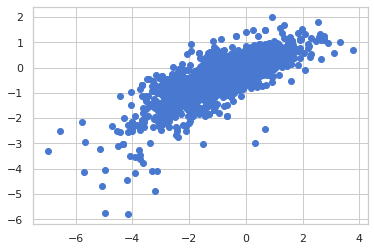

In [133]:
plt.scatter( (kendall2z(zrc['CR-CL_corr']) - kendall2z(zrc['Even-Odd_corr']))/(np.sqrt(1/18)), zrc['CR-CL_Even-Odd_b_corr_z'])

In [135]:
((kendall2z(zrc['CR-CL_corr']) - kendall2z(zrc['Even-Odd_corr']))/(np.sqrt(1/18)) < -2).sum()

/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in arctanh
  result = getattr(ufunc, method)(*inputs, **kwargs)


368

## Test single subject API

In [4]:
import TreeMazeAnalyses2,Analyses.tree_maze_functions as tmf
import TreeMazeAnalyses2.Analyses.experiment_info as ei

In [6]:
#ei = reload(ei)

subject = 'Ne'
session = 'NE_T3g_070518'
session_info = ei.SubjectSessionInfo(subject, session)

In [7]:
pz = session_info.get_pos_zones(overwrite=True)

/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([], dtype=object)

In [43]:
print(session_info)


Session Information for subject Ne, session NE_T3g_053118
Number of curated units: 30
Methods listed below can be executed with get_{method}(), eg. get_spikes():
  -> track_data. Executed = True
  -> spikes. Executed = True
  -> binned_spikes. Executed = True
  -> fr. Executed = True
  -> pos_zones. Executed = True
  -> event_table. Executed = True
  -> trial_zone_rates. Executed = False
  -> zone_rates_comps. Executed = True

To run all analyses use run_analyses().



In [50]:
session_info.get_zone_rates_comps()

CR-CL_corr  CR-CL_t_m  CR-CL_t_var  Even-Odd_corr  Even-Odd_t_m  \
0     0.347072  -0.266075     0.480189       0.487179      0.377120   
1     0.130152   0.182292     0.701869       0.257760     -0.100345   
2     0.303688   0.179925     0.873018       0.174089      0.165269   
3     0.225597   0.057002     0.567103       0.101215      0.191627   
4     0.173536  -0.180984     0.398374      -0.136302      0.808170   
5    -0.347072  -0.312004     0.795638       0.117409      0.182405   
6     0.411255  -0.307913     0.554849       0.292848      0.188382   
7     0.459871   0.673407     0.531521       0.376518     -0.200157   
8     0.485901   0.230928     0.799301       0.440243     -0.160146   
9    -0.034707  -0.302176     0.723784       0.202840      0.309314   
10    0.332900  -0.149667     0.369904       0.497312     -0.286598   

    Even-Odd_t_var  Co-Inco_corr  Co-Inco_t_m  Co-Inco_t_var  Out-In_corr  \
0         0.413479      0.390313     0.683161       1.089022     0.282051   
1         0.897922      0.202279     0.729410       0.922202    -0.063428   
2         0.945685      0.367521     0.462881       2.736558     0.300945   
3         1.192580      0.065527     0.704890       1.027144    -0.014845   
4         0.749904     -0.029119    -0.088759       1.733903    -0.120108   
5         0.913900     -0.046590     0.250818       1.224855     0.330634   
6         1.390059      0.299145    -0.350177       1.784738     0.022942   
7         1.202923      0.373219     0.072709       0.784357     0.063428   
8         1.657349      0.350427     0.285123       1.862305     0.352227   
9         0.797682     -0.038609     0.567766       0.665736     0.228070   
10        0.521863      0.402200     0.355529       0.326067     0.134038   

    ...  Right_t_var  CoSw-IncoSw_corr  CoSw-IncoSw_t_m  CoSw-IncoSw_t_var  \
0   ...          0.0          0.452632        -0.091738           0.687246   
1   ...          0.0          0.452632         0.048091           0.332561   
2   ...          0.0          0.378947        -0.128629           0.412673   
3   ...          0.0          0.052632         0.029198           0.506407   
4   ...          0.0          0.150676         0.186760           0.562426   
5   ...          0.0          0.074876        -0.276647           1.232272   
6   ...          0.0          0.505263         0.230199           0.191602   
7   ...          0.0          0.494737        -0.298304           0.682222   
8   ...          0.0          0.366059        -0.190411           0.528276   
9   ...          0.0          0.491290         0.050637           0.535511   
10  ...          0.0          0.460566         0.293362           0.107952   

    CR-CL_p_corr_m  Even-Odd_p_corr_m  CR-CL_Even-Odd_p_corr_z  \
0              NaN           0.325354                      NaN   
1              NaN           0.180436                      NaN   
2              NaN           0.205690                      NaN   
3              NaN           0.097296                      NaN   
4              NaN           0.087464                      NaN   
5              NaN           0.120146                      NaN   
6              NaN           0.246736                      NaN   
7              NaN           0.248964                      NaN   
8              NaN           0.288378                      NaN   
9              NaN           0.155190                      NaN   
10             NaN           0.453218                      NaN   

    CR-CL_b_corr_m  Even-Odd_b_corr_m  CR-CL_Even-Odd_b_corr_z  
0         0.024228           0.325545                -1.406769  
1         0.112158           0.171380                -0.276142  
2         0.269866           0.153531                 0.544999  
3         0.100401           0.065574                 0.164723  
4        -0.040328          -0.023488                -0.085493  
5        -0.040292           0.120158                -0.716049  
6         0.141388           0.263923    

In [51]:
%%time
session_info.get_zone_rates_comps(overwrite=True)

CPU times: user 1min 47s, sys: 1.08 s, total: 1min 48s
Wall time: 1min 34s


CR-CL_corr  CR-CL_t_m  CR-CL_t_var  Even-Odd_corr  Even-Odd_t_m  \
0     0.347072  -0.266075     0.480189       0.487179      0.377120   
1     0.130152   0.182292     0.701869       0.257760     -0.100345   
2     0.303688   0.179925     0.873018       0.174089      0.165269   
3     0.225597   0.057002     0.567103       0.101215      0.191627   
4     0.173536  -0.180984     0.398374      -0.136302      0.808170   
5    -0.347072  -0.312004     0.795638       0.117409      0.182405   
6     0.411255  -0.307913     0.554849       0.292848      0.188382   
7     0.459871   0.673407     0.531521       0.376518     -0.200157   
8     0.485901   0.230928     0.799301       0.440243     -0.160146   
9    -0.034707  -0.302176     0.723784       0.202840      0.309314   
10    0.332900  -0.149667     0.369904       0.497312     -0.286598   

    Even-Odd_t_var  Co-Inco_corr  Co-Inco_t_m  Co-Inco_t_var  Out-In_corr  \
0         0.413479      0.390313     0.683161       1.089022     0.292848   
1         0.897922      0.202279     0.729410       0.922202    -0.063428   
2         0.945685      0.367521     0.462881       2.736558     0.298246   
3         1.192580      0.065527     0.704890       1.027144    -0.006748   
4         0.749904     -0.029119    -0.088759       1.733903    -0.130904   
5         0.913900     -0.046590     0.250818       1.224855     0.322537   
6         1.390059      0.299145    -0.350177       1.784738     0.004049   
7         1.202923      0.373219     0.072709       0.784357     0.063428   
8         1.657349      0.350427     0.285123       1.862305     0.352227   
9         0.797682     -0.038609     0.567766       0.665736     0.233468   
10        0.521863      0.402200     0.355529       0.326067     0.128081   

    ...  Even-Odd_boot_corr_m  Even-Odd-Inwards_boot_corr_m  \
0   ...              0.359919                      0.312899   
1   ...              0.187075                      0.205631   
2   ...              0.180318                      0.324334   
3   ...              0.097541                      0.093433   
4   ...             -0.022164                      0.199882   
5   ...              0.102047                      0.217187   
6   ...              0.301244                      0.494918   
7   ...              0.315309                      0.101353   
8   ...              0.369758                      0.272719   
9   ...              0.191071                      0.300392   
10  ...              0.483639                      0.293960   

    CR-CL_Even-Odd_boot_corr_zm  CR-CL_Even-Odd_boot_corr_zz  \
0                     -2.526566                    -2.499217   
1                     -0.806926                    -0.666218   
2                      0.421872                     0.321427   
3                      0.013483                     0.011480   
4                      0.272451                     0.143063   
5                     -1.022936                    -1.056026   
6                     -1.078584                    -1.073012   
7                      0.261031                     0.247307   
8                     -0.987698                    -0.764849   
9                     -2.068248                    -1.550935   
10                    -0.888613                    -0.493186   

    Co-Inco_Even-Odd_boot_corr_zm  Co-Inco_Even-Odd_boot_corr_zz  \
0                       -2.252588                      -2.052915   
1                       -0.844694                      -0.532382   
2                        1.085358                       0.840414   
3                       -0.244307                      -0.180198   
4                        0.041939                       0.023508   
5                       -0.586952                      -0.482624   
6                       -1.238643                      -1.433128   
7                        0.112981                       0.098150   
8                       -1.296246                      -0.977562   
9                   

In [5]:
zrc_s = session_info.get_zone_rates_comps(overwrite=True)

In [65]:
tmf = reload(tmf)

In [12]:
%%time
ta = tmf.TrialAnalyses(session_info)
ta.all_zone_rate_comp_analyses()

KeyboardInterrupt: 

In [66]:
b = tmf.BehaviorData(session_info, overwrite=True)

In [67]:
b.event_table[b.event_table.event=='R_blank']

event      t0      tE  dur  trial_num  out_bound
4     R_blank     384     388    4         -1          0
10    R_blank    1286    1290    4          0          1
19    R_blank    2201    2205    4          0          0
25    R_blank    2413    2417    4          1          1
35    R_blank    3790    3794    4          1          0
...       ...     ...     ...  ...        ...        ...
2421  R_blank  122864  122868    4        143          1
2426  R_blank  124072  124076    4        143          0
2432  R_blank  125379  125383    4        144          1
2440  R_blank  127062  127066    4        144          0
2447  R_blank  128119  128123    4        145          1

[439 rows x 6 columns]

In [59]:
b.reward_null_samps

array([-2,  2])

In [61]:
b.event_table.head(10)

event   t0    tE   dur  trial_num  out_bound
0    Start   -1    -1     0         -1          0
1      DE2  174   179     5         -1          0
2      DE1  250   255     5         -1          0
3       L1  362   386    24         -1          0
4  R_blank  384   408    24         -1          0
5      DE1  386   391     5         -1          0
6       RD  386   410    24         -1          0
7      RW1  386   410    24         -1          0
8       CR  392  1455  1063          0          1
9       L2  404  1288   884          0          1

In [47]:
b.events_ts['R_blank']

KeyError: 'R_blank'

In [20]:
b.event_table.loc[ (b.event_table.out_bound==0) & (b.event_table.trial_num==1)&(b.event_table.event=='DE1'), 't0'].values[0]

3792

In [26]:
b.events_ts.R

0         0
1         0
2         0
3         0
4         0
         ..
131414    0
131415    0
131416    0
131417    0
131418    0
Name: R, Length: 131419, dtype: int64

In [30]:
(np.array([-0.04,0.04])//0.02).astype(int)

array([-2,  2])

In [27]:
b.events

{'DE1': array([ 512.692411,  515.397879,  551.749677,  583.531289,  602.748125,
         625.438428,  641.892453,  658.696696,  660.328977,  674.154315,
         688.856215,  704.94849 ,  715.85358 ,  728.790012,  734.164135,
         740.808851,  756.10072 ,  770.720683,  785.994051,  798.767703,
         810.098573,  822.633599,  845.807277,  850.177744,  865.408082,
         882.564575,  895.62907 ,  910.306345,  924.584308,  928.66715 ,
         929.378838,  949.016517,  960.720106,  964.720948,  967.802228,
         984.570597,  998.43181 , 1013.817741, 1028.415173, 1039.440856,
        1051.681038, 1062.746628, 1075.038998, 1089.366086, 1104.272799,
        1116.420762, 1129.509851, 1141.07419 , 1146.101094, 1146.809719,
        1165.178618, 1177.784363, 1191.84217 , 1196.423637, 1211.745068,
        1234.839871, 1252.175583, 1255.458644, 1267.999827, 1272.121512,
        1274.285293, 1289.393693, 1300.499282, 1304.501124, 1308.126186,
        1327.44949 , 1341.72336 , 1355.34697

In [32]:
z = session_info.get_zone_rates_comps()

In [8]:
%%time
session_info.run_analyses(which='zone_rates_comps',overwrite=True)

CPU times: user 1min 42s, sys: 1.71 s, total: 1min 44s
Wall time: 57.3 s


In [9]:
session_info.session_analyses_table


track_data  spikes  binned_spikes    fr  pos_zones  \
Li_T3g_070618        True    True           True  True       True   

               event_table  trial_zone_rates  zone_rates_comps  
Li_T3g_070618         True             False              True

In [34]:
analyses_table = info.get_analyses_table(overwrite=True)

In [35]:
analyses_table.loc[session]

track_data           True
spikes               True
binned_spikes        True
fr                   True
pos_zones            True
event_table          True
trial_zone_rates    False
zone_rates_comps    False
scores                 -1
encoding_models        -1
Name: Li_T3g_070618, dtype: object

In [247]:
%%time
zq = ta.zone_rate_trial_quantification()

/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


CPU times: user 332 ms, sys: 4 ms, total: 336 ms
Wall time: 333 ms


In [248]:
zq

si      all_m     all_s  all_n    left_m    left_s  left_n  \
0   1.499982   8.551183  7.354212    183  2.448860  1.550814      79   
1   2.633656   1.765473  2.602840    183  0.426729  0.443561      79   
2   2.562347   1.741093  2.725352    183  0.095963  0.401039      79   
3   0.396126  10.364493  9.941719    183  2.838236  2.727991      79   
4   0.968092   9.467734  9.598747    183  4.219117  2.931926      79   
5   0.756163   9.103769  6.259940    183  4.480413  2.352574      79   
6   0.522614   1.008147  2.324606    183  0.272497  0.633658      79   
7   0.962758   2.056920  3.267201    183  0.685244  1.067119      79   
8   0.446793  19.612793  8.135257    183  1.267704  1.376103      79   
9   0.333822   6.728547  5.897638    183  0.830598  1.152858      79   
10  0.161109   4.655539  4.965700    183  0.847187  1.122536      79   
11  0.323214   5.723034  5.855917    183  1.571376  1.522634      79   
12  0.482990   7.178140  6.079549    183  2.281276  1.702890      79   
13  0.274573   7.031173  7.053701    183  1.221614  1.409352      79   
14  0.481328   7.434343  6.749914    183  1.327906  1.470986      79   
15  0.440361   4.906381  5.771890    183  1.034093  1.333142      79   
16  0.429349   4.776059  5.656249    183  1.333906  1.491723      79   
17  0.490339   4.625940  5.367815    183  1.320818  1.468884      79   
18  0.982417   4.110516  4.952454    183  2.157138  1.946900      79   
19  0.294366   5.181026  5.636456    183  1.374283  1.468910      79   
20  0.494939   5.785216  6.194932    183  1.528432  1.575007      79   
21  0.437500   6.851420  6.413231    183  1.979075  1.771034      79   

     right_m   right_s  right_n  ...  G1_n      G2_m      G2_s  G2_n  \
0   1.700155  1.950217      104  ...    61  5.980497  3.550682    83   
1   0.004748  0.042924      104  ...    61  0.027241  0.248179    83   
2   1.224650  1.254712      104  ...    61  0.250160  0.576289    83   
3   2.285596  2.687261      104  ...    61  6.576511  6.444494    83   
4   1.011539  1.411635      104  ...    61  7.722548  4.142607    83   
5   1.821833  1.731771      104  ...    61  4.517959  3.119066    83   
6   0.352637  0.822235      104  ...    61  1.522470  1.828564    83   
7   0.610076  1.015000      104  ...    61  2.581848  2.314849    83   
8   2.542200  2.125579      104  ...    61  1.219707  1.479879    83   
9   3.643205  2.645893      104  ...    61  5.115367  2.766774    83   
10  1.014109  1.469290      104  ...    61  3.279948  2.693727    83   
11  2.146309  2.185507      104  ...    61  4.144883  3.084171    83   
12  1.804734  1.802808      104  ...    61  8.180368  3.823763    83   
13  2.709709  2.541448      104  ...    61  4.514796  2.906970    83   
14  3.473183  2.764565      104  ...    61  7.825165  3.964758    83   
15  2.062636  2.337264      104  ...    61  3.615545  2.239409    83   
16  1.702315  2.055555      104  ...    61  4.922863  4.245863    83   
17  1.395392  1.741040      104  ...    61  6.948392  3.924461    83   
18  0.542730  1.152612      104  ...    61  2.282074  2.258855    83   
19  1.673073  1.943960      104  ...    61  3.134095  2.227784    83   
20  1.850815  2.040072      104  ...    61  3.008071  2.333115    83   
21  2.076295  2.090749      104  ...    61  4.538890  3.455897    83   

         G3_m      G3_s  G3_n       G4_m      G4_s  G4_n  
0   11.476319  5.041273    77  50.265127  9.352281    36  
1    0.007777  0.039192    77  12.969670  4.955382    36  
2    0.135309  0.390233    77   0.043169  0.168655    36  
3    8.241489  7.510252    77  15.066261  9.724346    36  
4    2.074170  3.350138    77   2.454470  3.673561    36  
5   16.713312  5.217045    77  25.112223  6.016232    36  
6    1.977079  2.314695    77   1.165406  1.818967    36  
7    0.540419  1.015039    77   0.998092  1.183241    36  
8    0.895122  1.527652    77   0.733125  1.310326    36  
9    3.055043  2.411772    77   1.794112  1.799201    36  
10   4.419664  3.259161    77   2.994497  2.927

In [97]:
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info)

In [98]:
%%time
bcorr = ta.zone_rate_maps_cue_balanced_perf_corr()

CPU times: user 18.4 s, sys: 293 ms, total: 18.7 s
Wall time: 28.8 s


In [99]:
%%time 
eo_corrs = ta.zone_rate_maps_permute_corr(cond1='Even', cond2='Odd')

CPU times: user 18.6 s, sys: 336 ms, total: 18.9 s
Wall time: 29.1 s


In [100]:
eo_corrs.head()

0         1         2         3         4         5         6   \
0  0.726885  0.735420  0.743954  0.746799  0.743954  0.738265  0.729730   
1  0.755617  0.755617  0.755617  0.755617  0.755617  0.755617  0.755617   
2  0.515391  0.523981  0.506801  0.521118  0.526844  0.518255  0.518255   
3  0.650071  0.681366  0.681366  0.681366  0.684211  0.678521  0.675676   
4  0.854720  0.860475  0.857597  0.860475  0.857597  0.860475  0.860475   

         7         8         9   ...        90        91        92        93  \
0  0.738265  0.738265  0.732575  ...  0.743954  0.735420  0.732575  0.718350   
1  0.755617  0.755617  0.755617  ...  0.755617  0.755617  0.755617  0.755617   
2  0.518255  0.518255  0.518255  ...  0.518255  0.518255  0.512528  0.518255   
3  0.681366  0.678521  0.669986  ...  0.678521  0.687055  0.669986  0.687055   
4  0.860475  0.860475  0.863353  ...  0.860475  0.860475  0.857597  0.869109   

         94        95        96        97        98        99  
0  0.729730  0.732575  0.738265  0.729730  0.732575  0.706970  
1  0.759593  0.755617  0.755617  0.755617  0.751640  0.755617  
2  0.496405  0.521118  0.521118  0.518255  0.515391  0.541161  
3  0.687055  0.684211  0.672831  0.672831  0.689900  0.681366  
4  0.860475  0.863353  0.863353  0.857597  0.857597  0.854720  

[5 rows x 100 columns]

In [249]:
%%time
corrs, ns = ta.zone_rate_maps_group_trials_perm_bcorr()

[autoreload of Analyses.tree_maze_functions failed: Traceback (most recent call last):
  File "/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<froz

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [284]:
zc = ta.zones_by_trial['out'].sum()
zp = zc/zc.sum()

In [254]:
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info)

In [335]:
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info)

In [322]:
df = ta.zone_rate_maps_comparison_analyses()

/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/scipy/stats/mstats_basic.py:1067: RuntimeWarning: divide by zero encountered in true_divide
  denom = ma.sqrt(svar*(1.0/n1 + 1.0/n2))  # n-D computation here!
/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/scipy/stats/mstats_basic.py:1067: RuntimeWarning: divide by zero encountered in true_divide
  denom = ma.sqrt(svar*(1.0/n1 + 1.0/n2))  # n-D computation here!


In [336]:
%%time
df = ta.all_zone_rate_comp_analyses()

/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/scipy/stats/mstats_basic.py:1067: RuntimeWarning: divide by zero encountered in true_divide
  denom = ma.sqrt(svar*(1.0/n1 + 1.0/n2))  # n-D computation here!
/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/scipy/stats/mstats_basic.py:1067: RuntimeWarning: divide by zero encountered in true_divide
  denom = ma.sqrt(svar*(1.0/n1 + 1.0/n2))  # n-D computation here!


CPU times: user 1min 3s, sys: 970 ms, total: 1min 4s
Wall time: 54.5 s


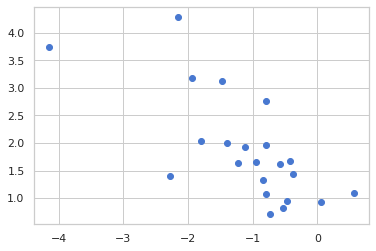

In [341]:
plt.scatter(df['CR-CL-Even-Odd_bcorr_z'], df['CR-CL_t_var']/df['Even-Odd_t_var'])

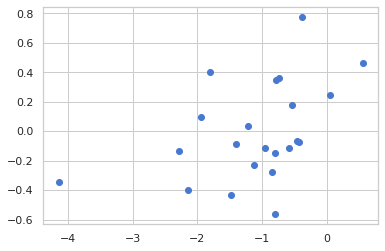

In [344]:
plt.scatter(df['CR-CL-Even-Odd_bcorr_z'], df['CR-CL_t_m']-df['Even-Odd_t_m'])

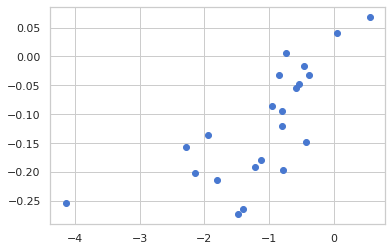

In [345]:
plt.scatter(df['CR-CL-Even-Odd_bcorr_z'], df['CR-CL_corr']-df['Even-Odd_corr'])

# Test of Subject Info API

In [9]:
from TreeMazeAnalyses2.Analyses import experiment_info as ei
import TreeMazeAnalyses2,Analyses.tree_maze_functions as tmf
import TreeMazeAnalyses2.Analyses.plot_functions as pf

from importlib import reload


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [13]:
ei = reload(ei)
info = ei.SummaryInfo()

In [14]:
%%time
info.update_paths()

CPU times: user 43.5 s, sys: 1.84 s, total: 45.4 s
Wall time: 45.5 s


In [15]:
%%time
info.run_analyses(task='T3', overwrite=True, which='pos_zones')

........................................................................................................................................................................................................................Tree Maze Track Data Not Found or Overwrite = True, processing...
Analysis pos_zones failed.
.Tree Maze Track Data Not Found or Overwrite = True, processing...
Analysis pos_zones failed.
.Tree Maze Track Data Not Found or Overwrite = True, processing...
Analysis pos_zones failed.
.Tree Maze Track Data Not Found or Overwrite = True, processing...
Analysis pos_zones failed.
.Tree Maze Track Data Not Found or Overwrite = True, processing...
Analysis pos_zones failed.
.Tree Maze Track Data Not Found or Overwrite = True, processing...
Analysis pos_zones failed.
.Tree Maze Track Data Not Found or Overwrite = True, processing...
Analysis pos_zones failed.
...Tree Maze Track Data Not Found or Overwrite = True, processing...
Analysis pos_zones failed.
.....CPU times: user 49min 30s,

In [9]:
info.get_analyses_table(overwrite=True)

track_data  spikes  binned_spikes     fr pos_zones event_table  \
Li_T3g_052818        True    True           True   True      True        True   
Li_OF_052818         True    True           True   True        -1          -1   
Li_T3g_052918        True    True           True   True      True        True   
Li_OF_052918         True    True           True   True        -1          -1   
Li_OF_053018         True    True           True   True        -1          -1   
...                   ...     ...            ...    ...       ...         ...   
Mi_OF_021220         True    True           True   True        -1          -1   
Mi_OF_021320        False   False          False  False        -1          -1   
Mi_OF_021720         True    True           True   True        -1          -1   
Mi_OF_021820         True    True           True   True        -1          -1   
Mi_OF_022020        False   False          False  False        -1          -1   

              trial_zone_rates zone_rates_comps scores encoding_models  
Li_T3g_052818            False            False     -1              -1  
Li_OF_052818                -1               -1   True            True  
Li_T3g_052918            False            False     -1              -1  
Li_OF_052918                -1               -1   True            True  
Li_OF_053018                -1               -1   True            True  
...                        ...              ...    ...             ...  
Mi_OF_021220                -1               -1   True            True  
Mi_OF_021320                -1               -1  False           False  
Mi_OF_021720                -1               -1   True            True  
Mi_OF_021820                -1               -1   True            True  
Mi_OF_022020                -1               -1  False           False  

[409 rows x 10 columns]

In [16]:
subject = 'Li'
session = 'Li_T3g_052818'
session_info = ei.SubjectSessionInfo(subject,session)

In [17]:
pz_all = session_info.get_pos_zones(overwrite=True)

In [22]:
t = session_info.get_pos_zones_mat()
t.sum().sum(), len(t)

(76235, 76235)

# get track spikes etc.

In [3]:
%matplotlib inline
%load_ext autoreload
import numpy as np
from scipy.stats import ttest_ind, ttest_1samp
import pandas as pd
from importlib import reload

import matplotlib.pyplot as plt
import seaborn as sns


import TreeMazeAnalyses2,Analyses.tree_maze_functions as tmf
import TreeMazeAnalyses2.Analyses.experiment_info as ei
import TreeMazeAnalyses2.Analyses.plot_functions as pf

import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
ei = reload(ei)
info = ei.SummaryInfo()

subject = 'Li'
session = 'Li_T3g_070618'
session_info = ei.SubjectSessionInfo(subject, session)

In [76]:
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info)
tree_maze = tmf.TreeMazeZones()

In [77]:
%autoreload 2

def plot_trial_track_spikes(trial_analyses, unit=0, ax=None):
    
    lw = 0.1 # line width
    la = 0.3 # line alpha
    lc = '0.5' # line color
    
    ss = 2 # scatter scale
    sc = 'r' # scatter color 
    sa = 0.3 # scatter alpha
    
    if ax is None:
        f,ax = plt.subplots()
    else:
        f = ax.figure
        
    x,y = trial_analyses.get_trial_track_pos()
    invalid_samps = ta.pz_invalid_samps
    spk = trial_analyses.get_trial_neural_data(data_type='spikes')
    
    for tr in range(trial_analyses.n_trials):
        ax.plot(x[tr], y[tr], linewidth=lw, alpha=la, color=lc)
        ax.scatter(x[tr], y[tr], s=spk[unit,tr]*ss, color=sc, alpha=sa, linewidth=0)

    ax.axis("square")
    ax.axis("off")
    ax.set_ylim(trial_analyses.y_edges[0], trial_analyses.y_edges[-1])
    ax.set_xlim(trial_analyses.x_edges[0], trial_analyses.x_edges[-1])
    
    return ax

def plot_trial_rate_map(trial_analyses, unit=0, ax=None):
    cmap = 'viridis'
    
    if ax is None:
        f,ax = plt.subplots()
    else:
        f = ax.figure    
    
    fr_maps_trials = trial_analyses.get_trial_rate_maps(occ_rate_mask=True)
    
    ax = sns.heatmap(fr_maps_trials[unit], cbar=False, square=True, cmap=cmap, ax=ax)
    ax.invert_yaxis()
    ax.axis("off")
    
    data = fr_maps_trials[unit].flatten()
    data_colors, color_array = pf.get_colors_from_data(data, cmap=cmap)
    
    ax_p = ax.get_position()
    w, h = ax_p.width, ax_p.height
    x0,y0 = ax_p.x0, ax_p.y0

    cax_p = [x0+w*0.85, y0+h*0.05, w*0.05, h*0.15]
    cax = f.add_axes(cax_p)

    pf.get_color_bar_axis(cax, color_array, color_map=cmap, label='FR')

    return ax

def plot_zone_rates(zone_rates, ax=None, min_value=0, max_value=None, label='FR', color_map='YlOrRd', div=False):
    if ax is None:
        f,ax = plt.subplots()
    else:
        f = ax.figure
    
    tree_maze.plot_zone_activity(zone_rates,  ax=ax, min_value=min_value, max_value=max_value, color_map=color_map, label=label)

#trials = np.arange(145,183)

#ta = tmf.TrialAnalyses(session_info, trials)
unit = 0
#ta = tmf.TrialAnalyses(session_info)
@interact(unit=widgets.IntSlider(value=0, max=ta.n_units))
def plot_maps(unit):
    f,ax = plt.subplots(1,3,figsize=(6,2),dpi=400)
    plot_trial_track_spikes(ta, unit=unit, ax=ax[0])
    plot_trial_rate_map(ta,unit=unit, ax=ax[1])
    zone_rates = ta.get_avg_trial_zone_rates() 
    plot_zone_rates(zone_rates.loc[unit], ax=ax[2])

interactive(children=(IntSlider(value=0, description='unit', max=22), Output()), _dom_classes=('widget-interac…

# approach 1: pooled trial data

In [78]:
@interact(unit=widgets.IntSlider(value=0, max=ta.n_units), condition1=ta._trial_conditions.keys(), condition2=ta._trial_conditions.keys())
def plot_maps(unit, condition1, condition2, scale=['max', 'min', 'self']):
    
    trials1 = ta.get_condition_trials(condition1)
    zr1 = ta.get_avg_trial_zone_rates(trials1)
    m1 = zr1.loc[unit].max()
    
    trials2 = ta.get_condition_trials(condition2)
    zr2 = ta.get_avg_trial_zone_rates(trials2)
    m2 = zr2.loc[unit].max()
    
    f,ax = plt.subplots(1,2,figsize=(4,2),dpi=400)

    if scale=='max':
        m = max(zr1.loc[unit].max(),zr2.loc[unit].max())
    elif scale =='min':
        m = min(zr1.loc[unit].max(),zr2.loc[unit].max())
    else:
        m = None
        
    plot_zone_rates(zr1.loc[unit], ax=ax[0], max_value=m)
    ax[0].set_title(condition1)
    
    plot_zone_rates(zr2.loc[unit], ax=ax[1], max_value=m)
    ax[1].set_title(condition2)
    
    print(f"kendall = {zr1.loc[unit].corr(zr2.loc[unit], method='kendall') :0.2f}") 
    print(f"pearson = { zr1.loc[unit].corr(zr2.loc[unit]):0.2f}" )

interactive(children=(IntSlider(value=0, description='unit', max=22), Dropdown(description='condition1', optio…

In [ ]:
fr = session_info.get_fr()
fr.shape

In [80]:
spikes = session_info.get_binned_spikes()
fr = session_info.get_fr()

track_data = session_info.get_track_data()
pos_zones = session_info.get_pos_zones()
behav = session_info.get_event_behavior()
trial_table = behav.get_trial_table()

In [81]:
trial_conditions = dict(CL = {'cue':'L'}, 
                       CR = {'cue': 'R'},
                       DL = {'dec': 'L'}, 
                       DR = {'dec': 'R'}, 
                       Co = {'correct': 1},
                       InCo = {'correct': 0}, 
                       CoCL = {'correct':1, 'cue': 'L'},
                       CoCR = {'correct':1, 'cue': 'R'},
                       InCoCL = {'correct':0, 'cue': 'L'},
                       InCoCR = {'correct':0, 'cue': 'R'},  
                       CoSw = {'correct': 1, 'sw':1},
                       IncCoSw = {'correct': 0, 'sw':1})

trial_conditions['all'] = ''
trial_conditions['Even'] = ''
trial_conditions['Odd'] = ''

def generate_trial_condition_table():
    
    n_trials = len(trial_table)
    n_conditions = len(trial_conditions)
    
    temp = np.zeros((n_trials, n_conditions), dtype=bool)
    
    trial_condition_table = pd.DataFrame(temp, columns=list(trial_conditions.keys()) )
    
    for condition in trial_conditions:
        cond_bool = np.ones(n_trials, dtype=bool)
        
        if condition=='all':
            pass
        elif condition=='Even':
            cond_bool[::2]=False
        elif condition=='Odd':
            cond_bool[1::2]=False
        else:
            sub_condition = trial_conditions[condition]    
            cond_bool = np.ones(n_trials, dtype=bool)

            for sc, val in sub_condition.items():
                cond_bool = (cond_bool) & (trial_table[sc]==val)

        trial_condition_table.loc[:, condition] = cond_bool
    
    return trial_condition_table

def get_condition_trials(condition, n_sel_trials=None, seed=None):
    
    if seed is not None:
        np.random.seed(seed)
    
    n_trials = len(trial_table)

    trials = np.arange(n_trials)
    if condition=='all':
        pass
    elif condition=='Even':
        trials = trials[::2]
    elif condition=='Odd':
        trials = trials[1::2]
    else:
        sub_condition = trial_conditions[condition]    
        for sc, val in sub_condition.items():
            sc_trials = trial_table.index[trial_table[sc]==val]
            trials = np.intersect1d(trials, sc_trials)
            
    if n_sel_trials is not None:
        trials = np.random.choice(trials, n_sel_trials, replace=False)
            
    return trials
      
trial_condition_table = generate_trial_condition_table()


In [83]:
%autoreload 2

@interact(unit=widgets.IntSlider(value=0, max=ta.n_units), condition=ta._trial_conditions.keys())
def plot_maps(unit, condition):
    
    trials = ta.get_condition_trials(condition)
    zone_rates = ta.get_avg_trial_zone_rates(trials) 

    f,ax = plt.subplots(1,3,figsize=(6,2),dpi=400)
    plot_trial_track_spikes(ta, unit=unit, ax=ax[0])
    plot_trial_rate_map(ta,unit=unit, ax=ax[1])
    plot_zone_rates(zone_rates.loc[unit], ax=ax[2])


interactive(children=(IntSlider(value=0, description='unit', max=22), Dropdown(description='condition', option…

Pros:
1. traditional approach
2. easy to compute

Cons:
1. unbalanced sampling of trials
2. insensitive to rate remapping

# second apporach using trials

In [113]:
@interact(unit=widgets.IntSlider(value=0, max=ta.n_units), condition1=trial_conditions.keys(), condition2=trial_conditions.keys(), occupation_thr=np.arange(10))
def plot_maps(unit, condition1, condition2, occupation_thr):
    
    trials1 = get_condition_trials(condition1)
    ta1 = tmf.TrialAnalyses(session_info, trials1)
    tzr1 = ta1.get_trial_zone_rates(occupation_thr=occupation_thr)

    trials2 = get_condition_trials(condition2)
    ta2 = tmf.TrialAnalyses(session_info, trials2)
    tzr2 = ta2.get_trial_zone_rates(occupation_thr=occupation_thr)

    f,ax = plt.subplots(1,3, figsize=(6,2),dpi=400)

    plot_zone_rates(tzr1[unit].mean(), ax=ax[0])
    plot_zone_rates(tzr2[unit].mean(), ax=ax[1])
    
    valid_zones1 = (~np.isnan(tzr1[unit])).sum(axis=0)>=occupation_thr
    valid_zones2 = (~np.isnan(tzr1[unit])).sum(axis=0)>=occupation_thr
    valid_zones = valid_zones1 & valid_zones2
    
    zr_t = pd.Series(ttest_ind(tzr2[unit], tzr1[unit], nan_policy='omit')[0].data, index=tzr1[unit].columns)
    zr_t[~valid_zones] = np.nan
    #plot_zone_rates(zr_t, div=True, color_map='icefire', min_value=None, label='T', ax=ax[2])
    tree_maze.plot_zone_activity(zr_t, div=True, color_map='icefire', min_value=None, label='T', ax=ax[2])
    

    
    t_zr_t = ttest_1samp(zr_t.values, 0, nan_policy='omit')[0]
    print(f"T={t_zr_t:0.2f}; var={np.nanvar(zr_t):0.2f}" )

interactive(children=(IntSlider(value=0, description='unit', max=22), Dropdown(description='condition1', optio…

Pros of the trial wise approach:
1. you get mean/sd per condition and zone
2. allows to compare distributions (eg. t-test) by zone
3. can quantify the extent of rate remapping across all zones by computing a single t-statistic across the zone t-values 
4. computing the variance of the t-values can give an indication of global remapping.
5. can compare with null statistics from a null/even trial split

Cons:
1. unordered measures / "independent"
2. parametric (though easily solved by using non-parametric methods...)

In [123]:
condition1='Even'
condition2='Odd'
unit=0
occupation_thr=2

ta = tmf.TrialAnalyses(session_info)

trials1 = ta.get_condition_trials(condition=condition1)
trials2 = ta.get_condition_trials(condition=condition2)

zr1 = ta.get_avg_zone_rates(trials=trials1)
zr2 = ta.get_avg_zone_rates(trials=trials2)

In [129]:
ta.get_avg_zone_rates(trials=trials1)

0     0.732575
1     0.755617
2     0.518255
3     0.681366
4     0.860475
5     0.786629
6     0.379801
7     0.706970
8     0.860597
9     0.752489
10    0.590327
11    0.550498
12    0.729730
13    0.758179
14    0.746799
15    0.448080
16    0.684211
17    0.598862
18    0.743954
19    0.453770
20    0.541963
21    0.570413
dtype: float64

In [148]:
tz = ta.get_trial_zones()

In [156]:
o = pd.DataFrame(np.zeros((ta.n_trials, ta.tmz.n_all_segs))*np.nan, columns=ta.tmz.all_segs_names)

o.loc[0] = pd.value_counts(tz[0])
o

H  a_0  a_1  a_2  a_3  a_4  a_5  a_6     D  b_0  ...  e_5    i2  f_0  \
0    124.0  1.0  4.0  4.0  3.0  3.0  5.0  3.0  46.0  NaN  ...  4.0  17.0  3.0   
1      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
2      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
3      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
4      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
..     ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...   ...  ...   
178    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
179    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
180    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
181    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
182    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   

      f_1   f_2     G3  g_0   g_1   g_2    G4  
0    11.0  14.0  113.0  NaN  15.0  12.0  19.0  
1     NaN   NaN    NaN  NaN   NaN   NaN   NaN  
2     NaN   NaN    NaN  NaN   NaN   NaN   NaN  
3     NaN   NaN    NaN  NaN   NaN   NaN   NaN  
4     NaN   NaN    NaN  NaN   NaN   NaN   NaN  
..    ...   ...    ...  ...   ...   ...   ...  
178   NaN   NaN    NaN  NaN   NaN   NaN   NaN  
179   NaN   NaN    NaN  NaN   NaN   NaN   NaN  
180   NaN   NaN    NaN  NaN   NaN   NaN   NaN  
181   NaN   NaN    NaN  NaN   NaN   NaN   NaN  
182   NaN   NaN    NaN  NaN   NaN   NaN   NaN  

[183 rows x 39 columns]

In [162]:
ta.get_trial_neural_data()[0,0]

array([11.54508497,  5.        ,  0.95491503,  0.        ,  0.95491503,
        5.        , 11.54508497, 15.        , 12.5       , 10.        ,
       12.5       , 15.        , 12.5       , 10.        , 12.5       ,
       15.        , 12.5       , 10.        , 13.45491503, 20.        ,
       23.09016994, 20.        , 12.5       ,  5.        ,  0.95491503,
        0.        ,  0.95491503,  5.95491503, 16.54508497, 26.54508497,
       26.54508497, 16.54508497,  5.95491503,  0.95491503,  0.        ,
        0.95491503,  5.        , 12.5       , 20.        , 23.09016994,
       20.        , 12.5       ,  5.        ,  0.95491503,  0.95491503,
        5.        , 11.54508497, 15.        , 12.5       , 10.        ,
       12.5       , 15.        , 11.54508497,  5.        ,  0.95491503,
        0.95491503,  5.        , 11.54508497, 15.        , 11.54508497,
        5.        ,  0.95491503,  0.        ,  0.95491503,  5.        ,
       11.54508497, 15.        , 11.54508497,  5.95491503,  5.95

In [158]:
o[o<10]=np.nan
o

H  a_0  a_1  a_2  a_3  a_4  a_5  a_6     D  b_0  ...  e_5    i2  f_0  \
0    124.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  46.0  NaN  ...  NaN  17.0  NaN   
1      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
2      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
3      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
4      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
..     ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...   ...  ...   
178    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
179    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
180    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
181    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   
182    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  NaN   NaN  NaN   

      f_1   f_2     G3  g_0   g_1   g_2    G4  
0    11.0  14.0  113.0  NaN  15.0  12.0  19.0  
1     NaN   NaN    NaN  NaN   NaN   NaN   NaN  
2     NaN   NaN    NaN  NaN   NaN   NaN   NaN  
3     NaN   NaN    NaN  NaN   NaN   NaN   NaN  
4     NaN   NaN    NaN  NaN   NaN   NaN   NaN  
..    ...   ...    ...  ...   ...   ...   ...  
178   NaN   NaN    NaN  NaN   NaN   NaN   NaN  
179   NaN   NaN    NaN  NaN   NaN   NaN   NaN  
180   NaN   NaN    NaN  NaN   NaN   NaN   NaN  
181   NaN   NaN    NaN  NaN   NaN   NaN   NaN  
182   NaN   NaN    NaN  NaN   NaN   NaN   NaN  

[183 rows x 39 columns]

In [ ]:
condition1='Even'
condition2='Odd'
unit=0
occupation_thr=2

ta = tmf.TrialAnalyses(session_info)
trials1 = self.get_condition_trials(condition=condition1)
tzr1 = ta1.get_trial_zone_rates(occupation_thr=occupation_thr)

trials2 = get_condition_trials(condition2)
ta2 = tmf.TrialAnalyses(session_info, trials2)
tzr2 = ta2.get_trial_zone_rates(occupation_thr=occupation_thr)

zr_t = pd.Series(ttest_ind(tzr2[unit], tzr1[unit], nan_policy='omit')[0].data, index=tzr1[unit].columns)

In [140]:
ttest_ind(tzr1[0], tzr2[0], nan_policy='omit')[0].data

array([-0.1383068 , -0.58102602, -0.44628279, -0.49074123, -0.35827732,
       -0.12092785, -0.71406914,  0.23473005,  0.51350818,  0.63941852,
        0.30027252,  0.26394286, -1.20244605,  1.04423409,  0.3803459 ,
        1.7894998 ,  0.22867671, -0.07775515,  0.26047457,  0.40712363,
       -0.68827712,  0.11591788,  0.82260361, -1.10802673,  0.54086264,
        0.35351214, -0.09132329, -0.04337961,  1.18030956,  0.39668483,
        1.3296637 ,  0.20298182, -0.19624515,  1.76370848,  2.07350469,
       17.97144077,  3.00947457,  2.53794088,  1.7844673 ])

In [145]:
pz = session_info.get_pos_zones()
pzm = session_info.get_pos_zones_mat()
pzm

H  a  D  b  i1  c  G1  d  G2  e  i2  f  G3  g  G4
0       0  0  0  1   0  0   0  0   0  0   0  0   0  0   0
1       0  0  0  1   0  0   0  0   0  0   0  0   0  0   0
2       0  0  0  1   0  0   0  0   0  0   0  0   0  0   0
3       0  0  0  1   0  0   0  0   0  0   0  0   0  0   0
4       0  0  0  1   0  0   0  0   0  0   0  0   0  0   0
...    .. .. .. ..  .. ..  .. ..  .. ..  .. ..  .. ..  ..
161890  1  0  0  0   0  0   0  0   0  0   0  0   0  0   0
161891  1  0  0  0   0  0   0  0   0  0   0  0   0  0   0
161892  1  0  0  0   0  0   0  0   0  0   0  0   0  0   0
161893  1  0  0  0   0  0   0  0   0  0   0  0   0  0   0
161894  1  0  0  0   0  0   0  0   0  0   0  0   0  0   0

[161895 rows x 15 columns]

# third approach balanced sub-sampling

number of trials

In [37]:
trial_set_nums = trial_condition_table.sum()[['CoCL','CoCR','InCoCL','InCoCR']]

n_sel_trials = trial_set_nums.min()

print(trial_set_nums)

CoCL      50
CoCR      64
InCoCL    39
InCoCR    30
dtype: int64


approach would be to obtain the min number of trials for one of those conditions, sample from those trials and construct balanced maps of correct/incorrect trials sets

In [50]:
ta = tmf.TrialAnalyses(session_info)
tzr = ta.get_trial_zone_rates()

In [60]:
%autoreload 2

unit=0

n_perm = 100
corr =  np.zeros(n_perm)

for p in range(n_perm):
    btzr = {'L':[], 'R':[]}
    for cue in ['L', 'R']:
        sc1 ='CoC'+cue
        sc2 ='InCoC'+cue

        trials1 = get_condition_trials(sc1, n_sel_trials=n_sel_trials)
        trials2 = get_condition_trials(sc2, n_sel_trials=n_sel_trials)

        balanced_trials = np.concatenate((trials1,trials2))
        btzr[cue] = tzr[unit].loc[balanced_trials].mean()

    corr[p]=btzr['L'].corr(btzr['R'], "kendall")

distribution of correlations

Mean Balanced Correlation  0.6644979392347813


/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


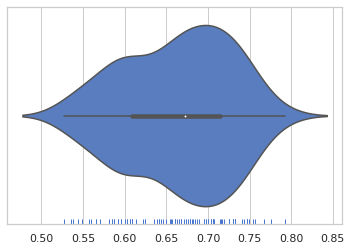

In [69]:
sns.violinplot(corr)
sns.rugplot(corr)
print("Mean Balanced Correlation ", corr.mean())

last correlation maps

Correlation 0.6977058029689609


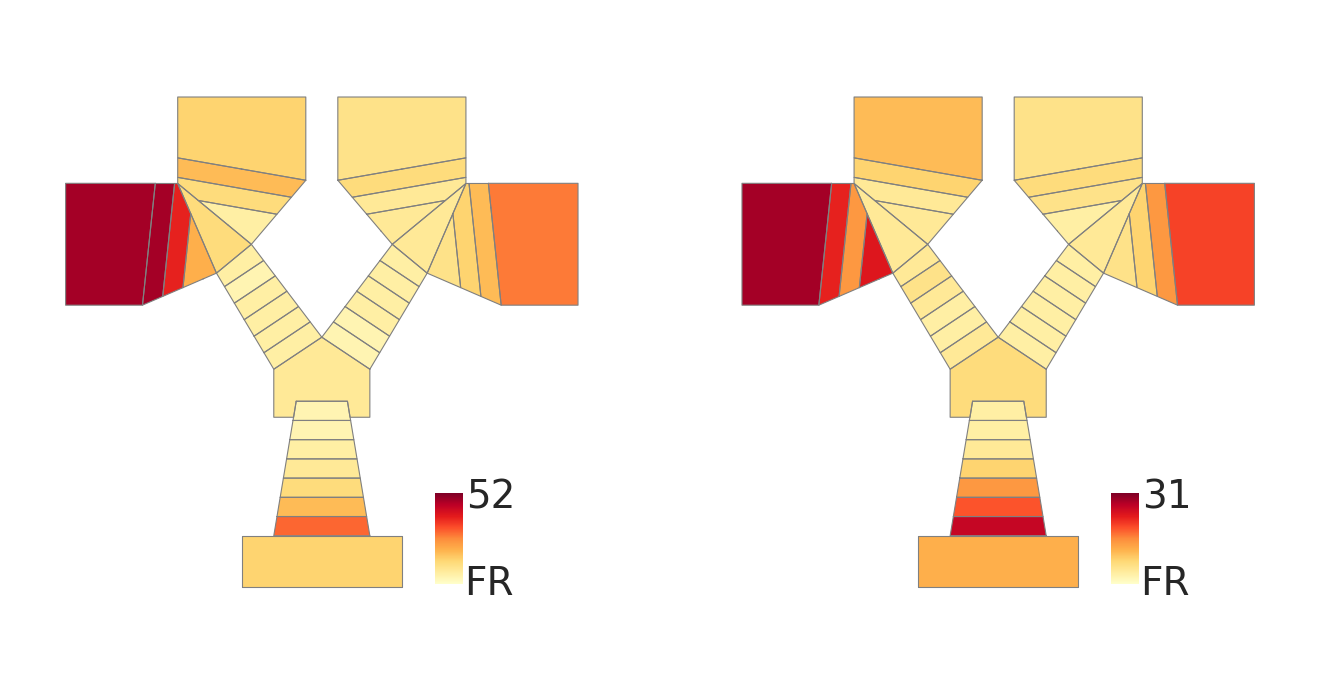

In [70]:
f,ax = plt.subplots(1,2,figsize=(4,2),dpi=400)

plot_zone_rates(btzr['L'], ax=ax[0])
plot_zone_rates(btzr['R'], ax=ax[1])

print("Correlation", corr[-1])

In [87]:
def foo(a=None):
    for i in range(2):
        if i==1:
            c=1
        else:
            c=np.inf

            
        if a is None:
            b = c
        else:
            b = a
    
    return a, b
foo()

(None, 1)

In [223]:
zr_t = pd.Series(ttest_ind(tzr2[unit], tzr1[unit], nan_policy='omit')[0].data, index=tzr1[unit].columns)
zr_t

H     -0.285915
a_0   -1.168893
a_1    0.811423
a_2    1.617649
a_3    1.565883
a_4    1.720952
a_5    0.096542
a_6    0.493731
D     -1.840746
b_0    0.524876
b_1   -1.101694
b_2   -1.545107
b_3   -0.415732
b_4   -0.638684
b_5   -2.259418
i1    -1.506055
c_0   -2.221938
c_1   -1.920569
c_2   -0.979288
G1    -1.748812
d_0   -1.756828
d_1   -0.598759
d_2   -3.059617
G2    -1.456304
e_0    0.603689
e_1   -0.231735
e_2   -0.451440
e_3    1.006682
e_4    2.379729
e_5    0.676344
i2    -3.050142
f_0    0.375166
f_1   -2.078576
f_2   -5.481370
G3    -2.652615
g_0    0.502028
g_1   -4.541181
g_2   -4.729735
G4    -4.513454
dtype: float64

In [222]:
ttest_1samp(zr_t.values, 0, nan_policy='omit')[0]

-3.3906208098065984

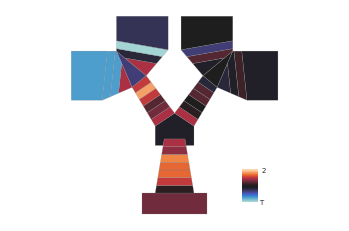

In [275]:
%autoreload 2
plot_zone_rates(zr_t, div=True, color_map='icefire', min_value=None, label='T')

In [253]:
dc, ca = pf.get_colors_from_data(zr_t,  div=True, color_map='coolwarm')

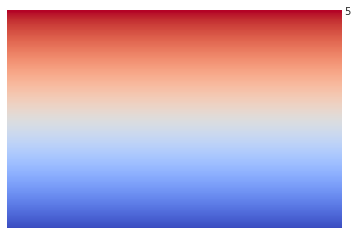

In [254]:
f,ax=plt.subplots()
pf.get_color_bar_axis(ax, ca, color_map='coolwarm', tick_fontsize=10)

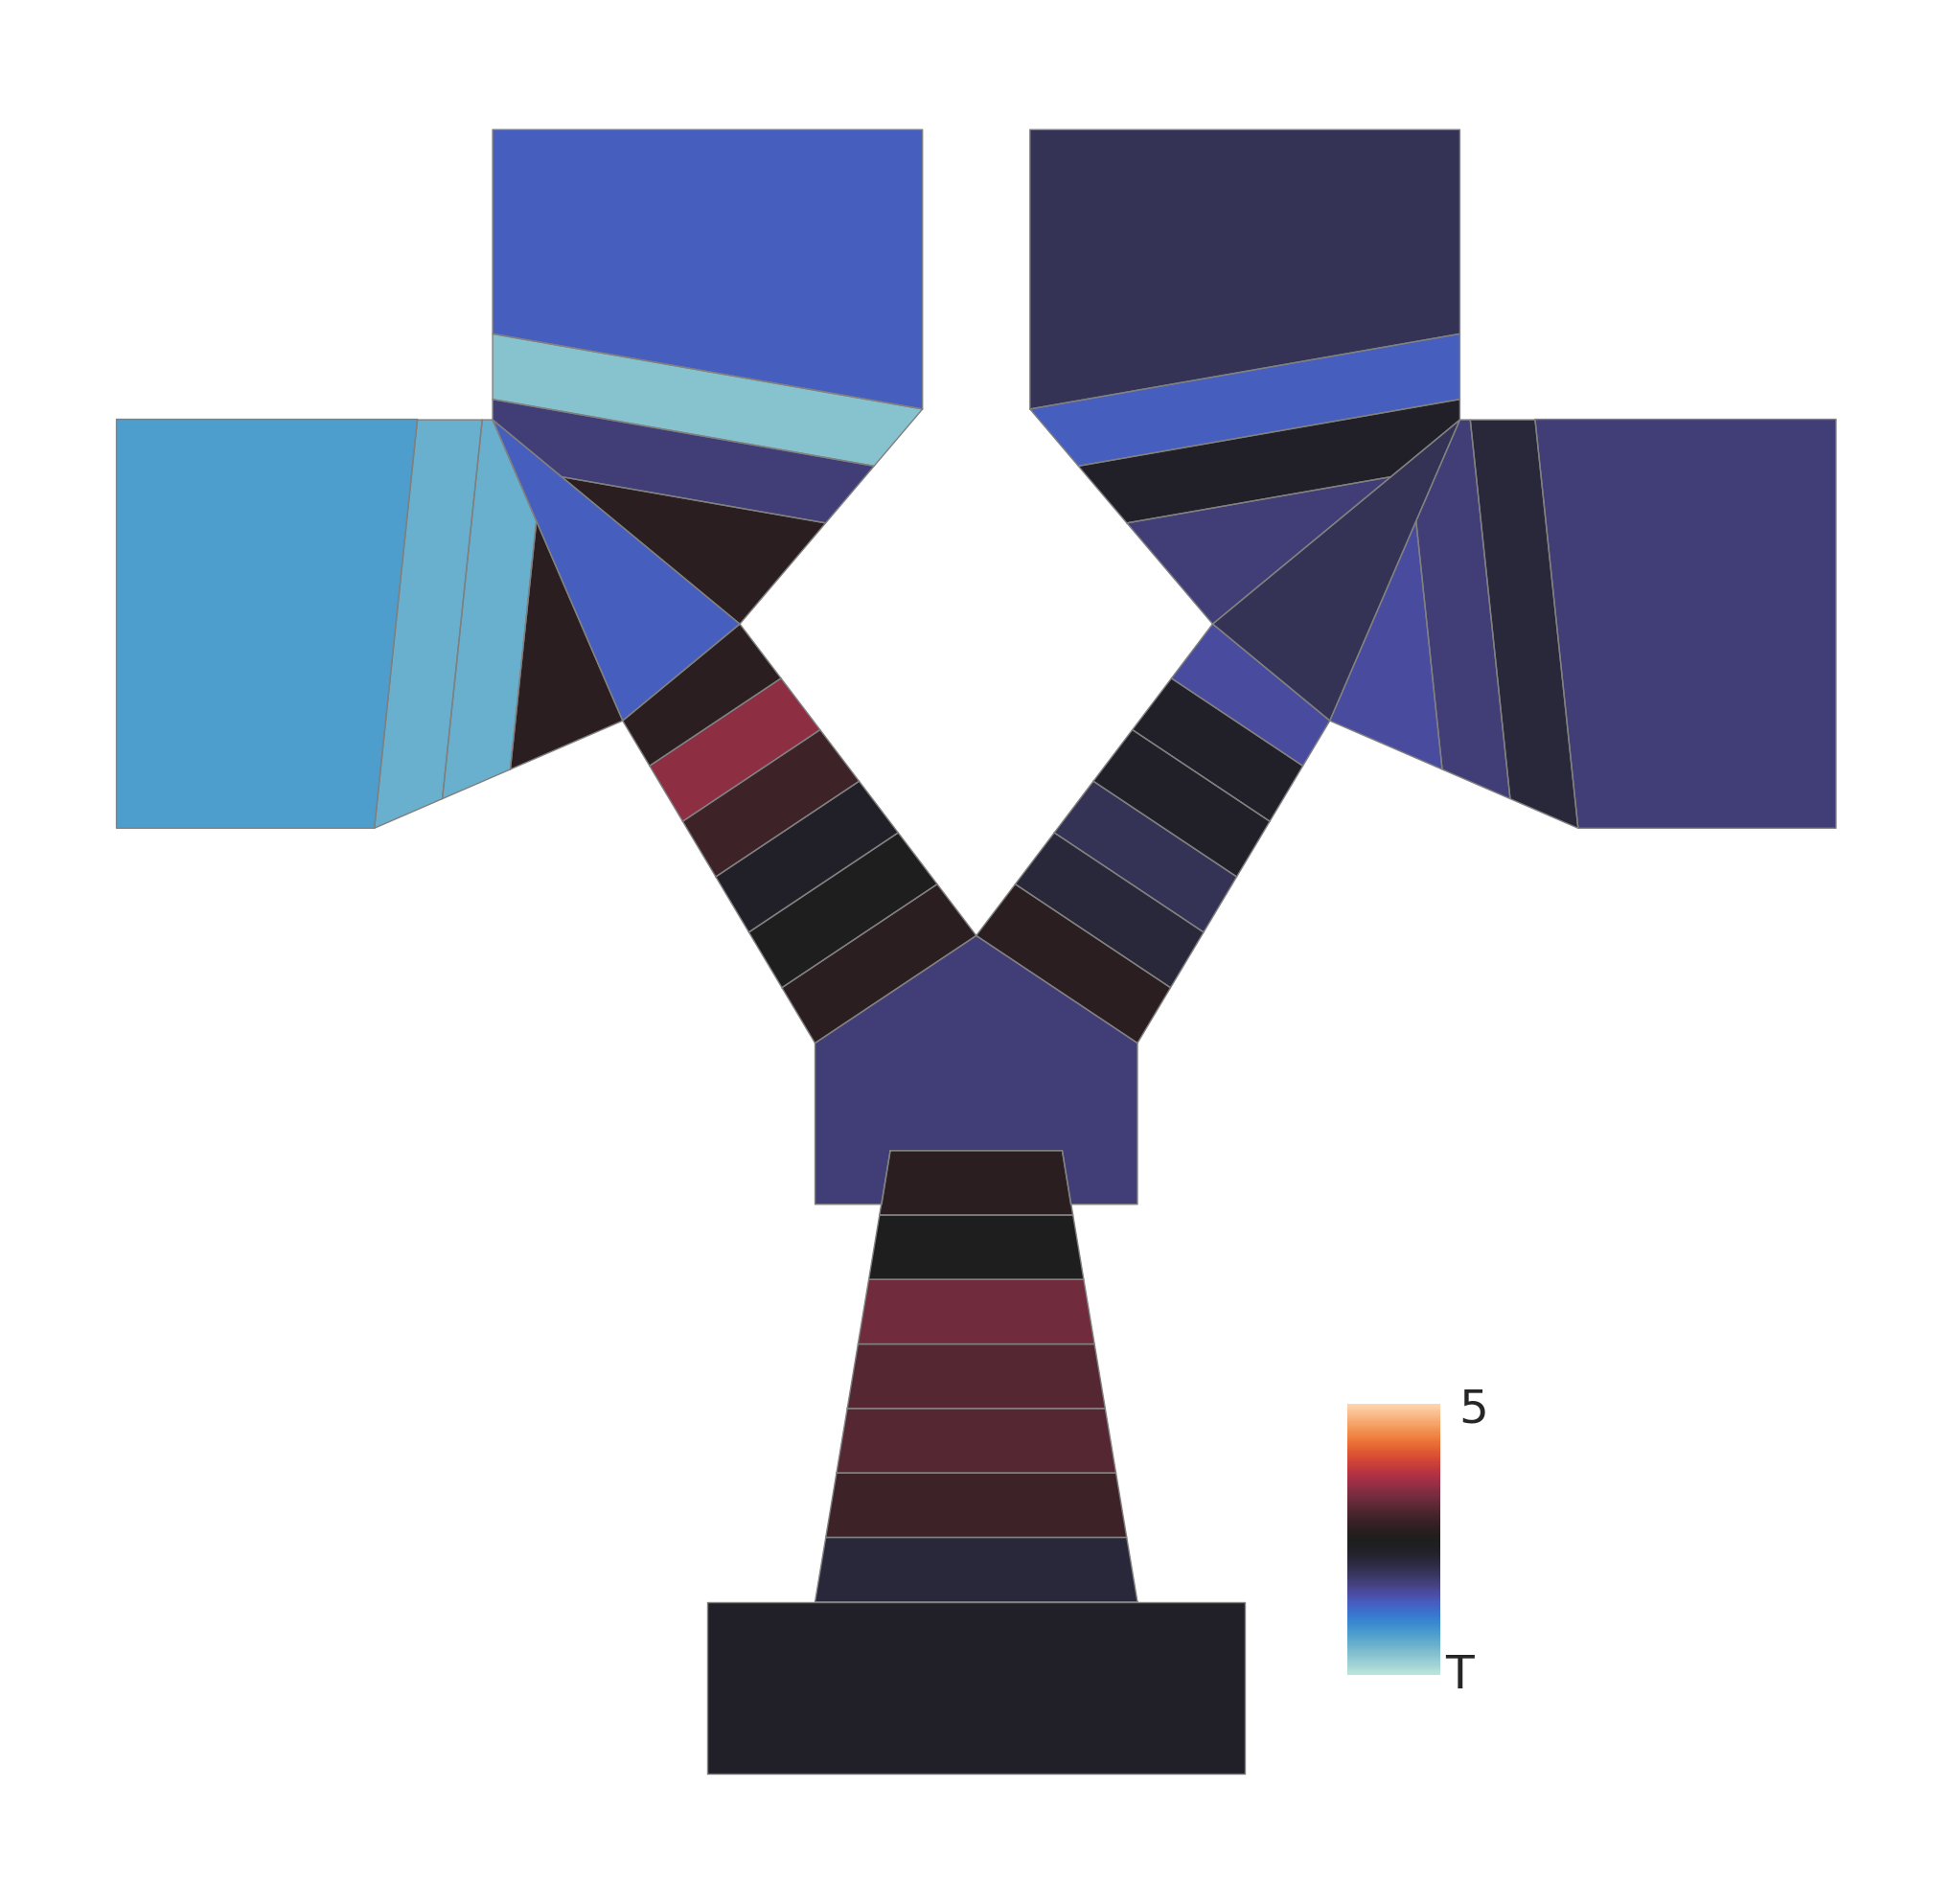

In [276]:
 tree_maze.plot_zone_activity(zr_t, div=True, color_map='icefire', min_value=None, label='T')

In [23]:
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info)
tree_maze = tmf.TreeMazeZones()

In [24]:
zone_rates = ta.get_trial_zone_rates()

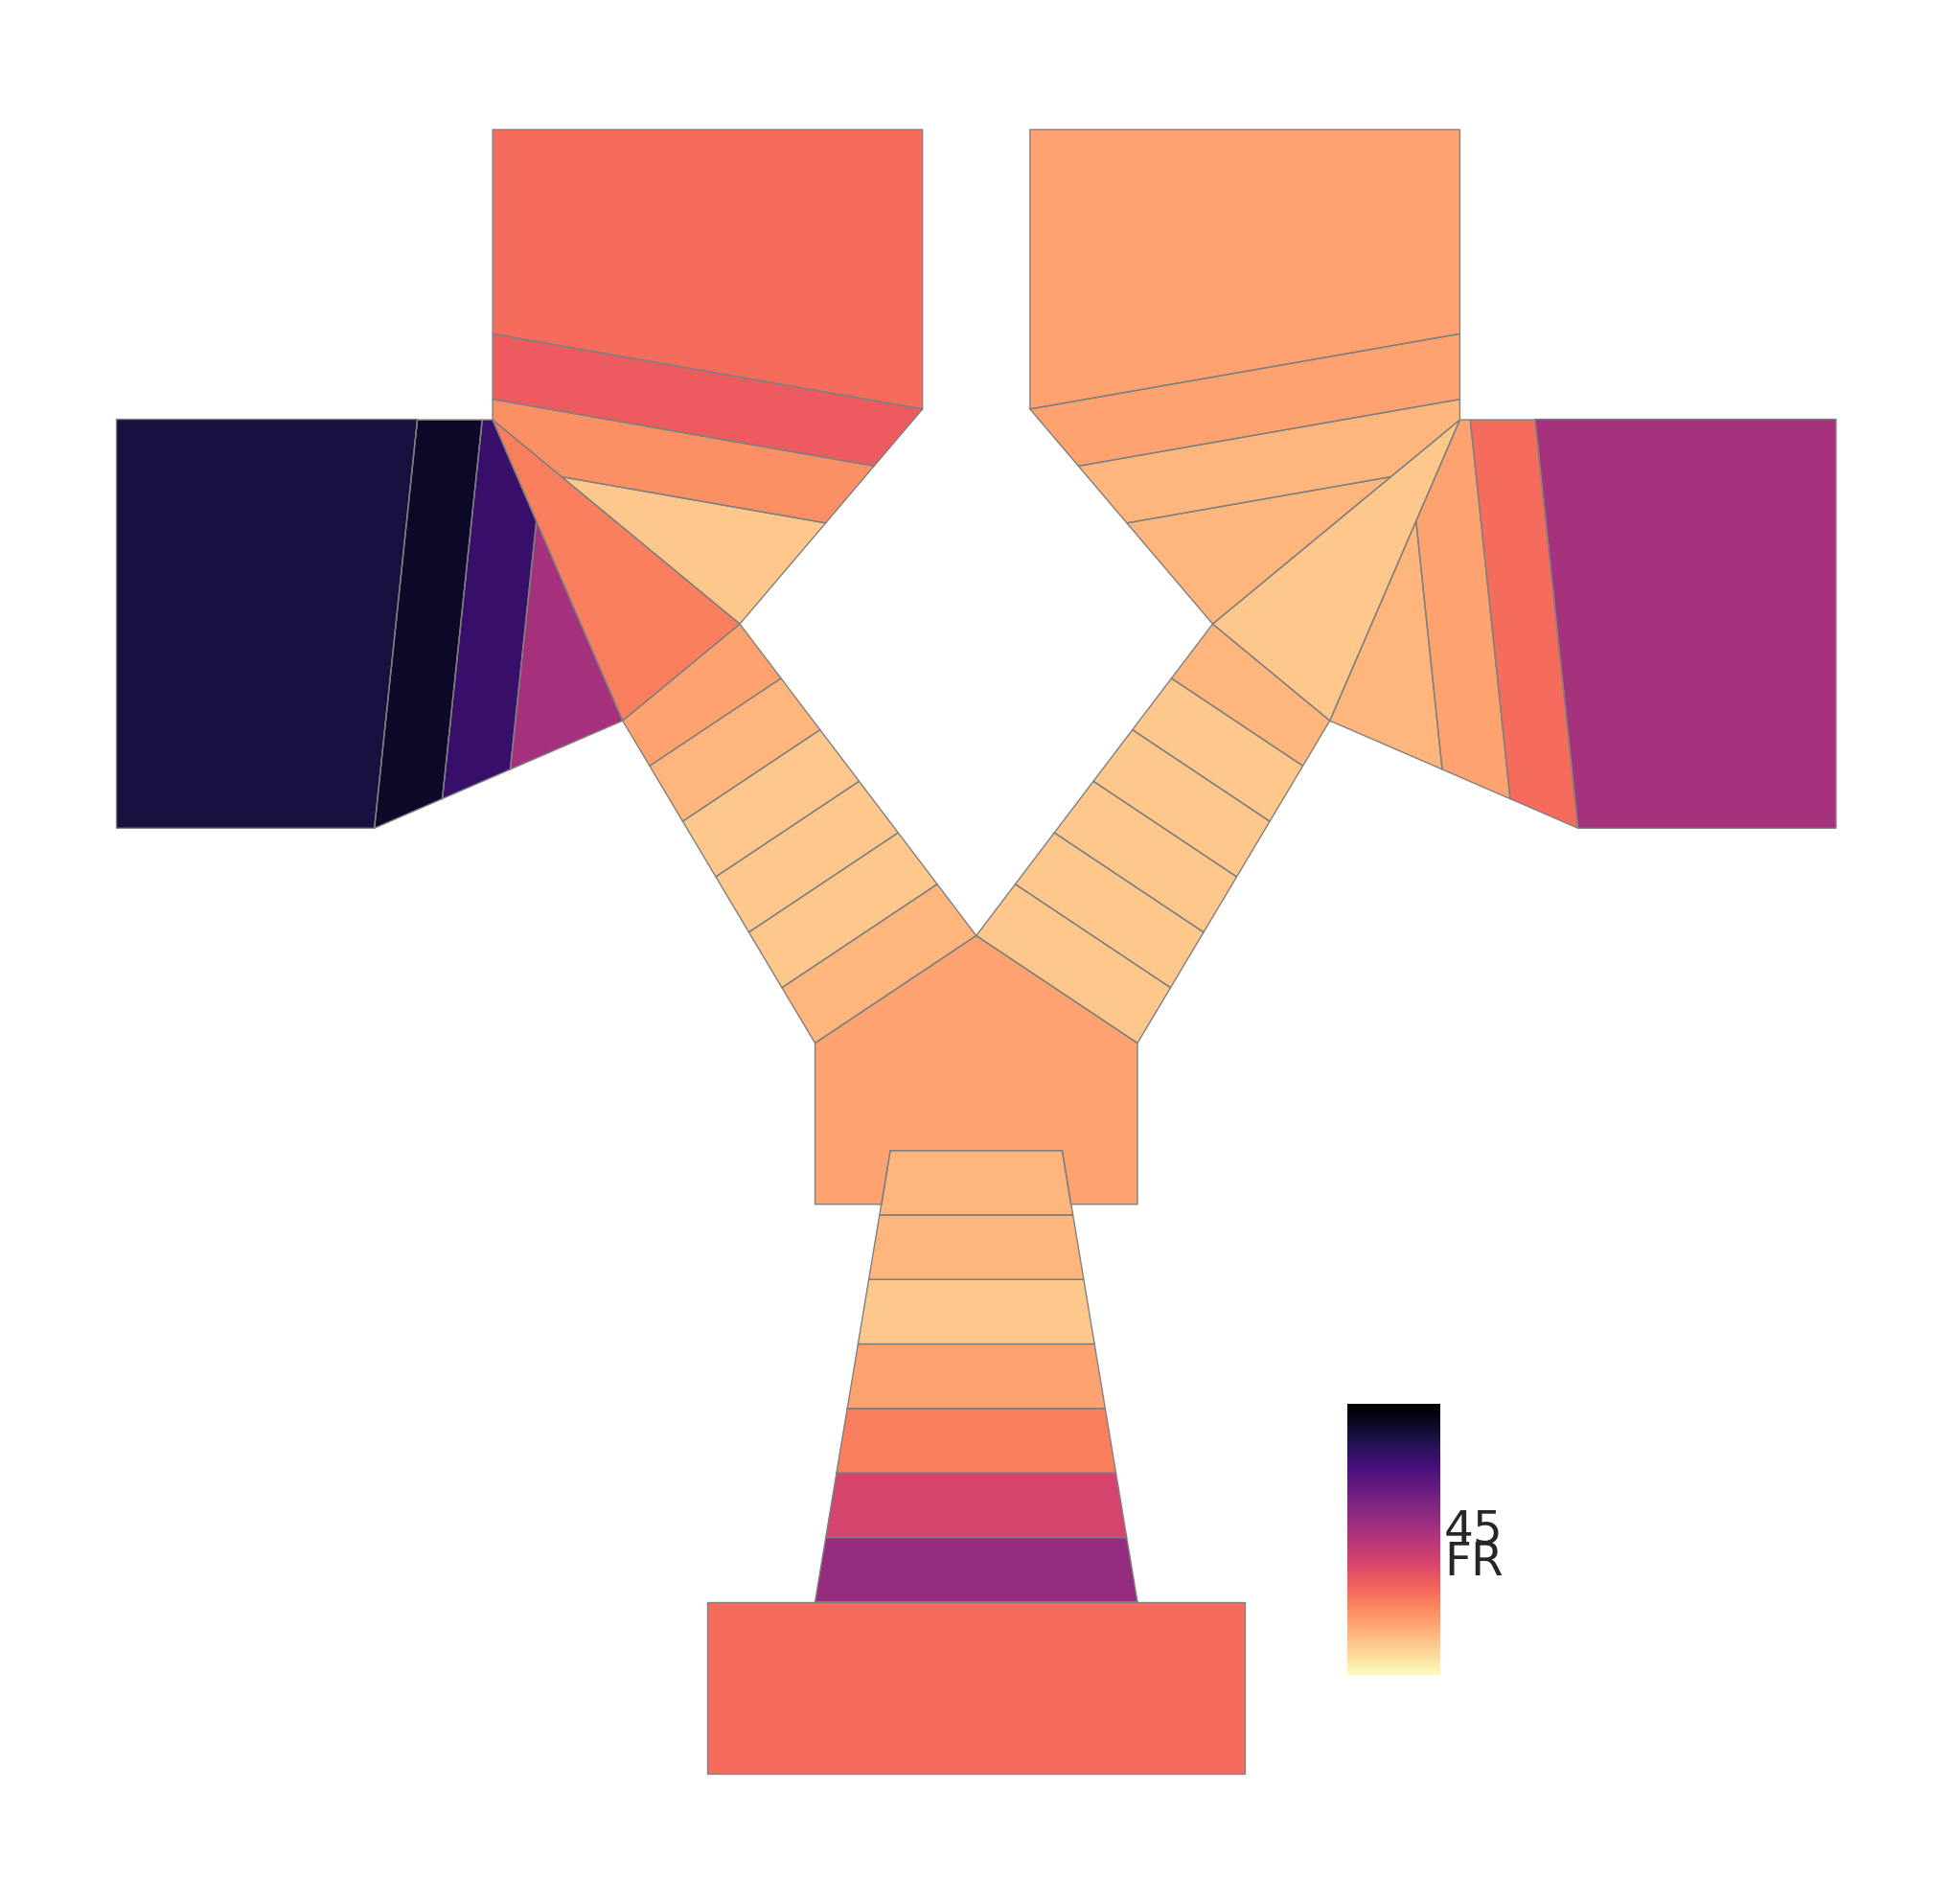

In [9]:
tmf = reload(tmf)
tree_maze = tmf.TreeMazeZones()

tree_maze.plot_zone_activity(zone_rates.loc[unit], min_value=0, color_map='magma_r')

In [73]:
a = dict(a=1)
a.update(dict(a=23))
a

{'a': 23}

In [62]:
zone_rates.loc[unit]

/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


H      13.592591
a_0    27.496360
a_1    18.252434
a_2    10.974610
a_3     5.979455
a_4     3.396532
a_5     4.620998
a_6     5.061592
D       6.884362
b_0     2.430969
b_1     2.807349
b_2     2.646638
b_3     2.434188
b_4     2.755762
b_5     4.473953
i1      3.815960
c_0     4.957969
c_1     6.839302
c_2    13.170554
G1     24.462542
d_0     5.255194
d_1     5.797750
d_2     7.300751
G2      6.925199
e_0     4.054113
e_1     2.432377
e_2     2.199982
e_3     3.413534
e_4     4.165923
e_5     6.631833
i2     10.550764
f_0     3.015325
f_1     9.798151
f_2    14.998610
G3     12.835373
g_0    24.885549
g_1    37.726285
g_2    45.269189
G4     41.734825
Name: 0, dtype: float64

In [297]:
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info, trials)
x,y = ta.get_trial_track_pos()
fr = ta.get_trial_neural_data(data_type='fr')

In [295]:
tmf = reload(tmf)
tree_maze = tmf.TreeMazeZones()

pz = session_info.get_pos_zones()
pzm = tree_maze.get_pos_zone_mat(pz, subsegs=True)

In [347]:
zone_rates = ta.get_trial_rate_zones()

In [348]:
zone_rates

H        a_0        a_1        a_2        a_3        a_4  \
0    9.607269  31.704594  42.635005  28.454243  11.493064   6.139304   
1    0.272230   7.204145  27.981196  18.712006   1.685372   0.014182   
2    3.052255   8.742004   1.783703   1.562295   0.402979   0.529257   
3    4.563740   8.988865  10.050241  10.067912   8.653846   6.448020   
4    4.361127  11.294154   6.969069  28.456076  30.454498  20.640643   
5    3.643358   3.330714   5.511741   5.127555   6.692597   7.795914   
6    1.906650   1.158676   1.291972   1.382353   0.476986   0.700718   
7    4.888303   9.980606   2.972734   1.701085   2.673051   1.256533   
8   14.245737  32.709975  35.408293  34.579147  41.182666  41.695971   
9    3.390813   4.064661   4.503472   2.867647   3.405895   4.870394   
10   5.368415   7.708924   7.131027   8.831292  10.191415   6.669676   
11   2.223644   3.255568   2.943322   3.088235   3.721732   3.853737   
12   6.327198   7.145438   5.563115   4.774614   8.205680   7.078092   
13   8.188618   7.266053  10.977025  17.672373   9.194383   4.129626   
14   7.438134  12.456233   7.760728  11.179629   5.513162   3.798389   
15   4.343377   6.449227   7.541972   5.003472   2.729928   5.153668   
16   1.587979   4.377358   5.367647   3.154822   2.824296   3.757649   
17   3.058378   7.313548   7.417382   7.490911   7.098466   5.635915   
18   2.192255   2.071868   1.428616   2.551061   0.645702   2.592477   
19   3.083611   7.216130   6.125410   8.186066   5.639581   3.211979   
20   2.562428  11.852134  14.250506   8.906967   6.734552   4.001136   
21   3.028910   8.233947  10.900024  12.625916   9.927438   4.879849   

          a_5        a_6          D        b_0  ...        e_5         i2  \
0    5.354499   2.910000   4.926103   0.188329  ...   0.364583   5.145199   
1    0.170503   0.000000   0.013425   0.000000  ...   0.000000   1.223733   
2    2.987096   0.643820   0.196879   0.000000  ...   0.793545   0.840324   
3    6.476985   8.172361   1.534026   1.756284  ...   4.203552   2.634607   
4    4.801525   0.789098   0.377367   0.056713  ...  27.279371  28.357116   
5    8.966444   9.338541   6.045499   7.846722  ...  12.271773  13.530392   
6    1.299127   0.993820   0.505267   1.109953  ...   0.488644   1.132531   
7    0.582773   0.330000   0.366853   0.000000  ...   4.776469   1.061396   
8   36.998657  45.456180  29.004460  30.685676  ...   4.283129   3.145518   
9    5.958122   6.257082   5.822620  11.850195  ...   2.291667   2.136656   
10   4.869980   4.394377   3.232137   3.463622  ...   4.335212   3.685065   
11   4.690153   4.309098   2.889788   6.403435  ...   4.779371   5.384314   
12   5.950766   7.006738   8.742115   9.171467  ...  11.661970  14.869225   
13   4.322160   4.514721   6.812762   9.336807  ...   4.779371   3.703667   
14   5.767754   4.692361   6.115131   5.994379  ...   4.142076   8.192756   
15   4.952162   4.451459   4.577452   5.764052  ...   4.399590   3.948637   
16   5.415832   4.590000   3.904467   2.717759  ...   6.406250  10.443608   
17   4.159013   6.344164   2.772859   2.252810  ...   5.203637   6.614807   
18   3.434695   4.370000   0.701492   0.223380  ...  11.259393  11.511204   
19   3.911858   3.485836   3.301714   6.040672  ...   6.770833   6.297797   
20   5.255262   2.790000   2.639843   1.967096  ...   1.614583   3.164121   
21   5.914453   3.839443   3.748092   8.106479  ...   2.495304   6.322600   

          f_0        f_1        f_2         G3  g_0        g_1        g_2  \
0    1.401909   8.725666  12.174275  10.197445  NaN  33.979384  45.769498   
1    0.000000   0.087273   0.000000   0.000000  NaN  17.229322  11.975658   
2    0.440196   0.674912   0.115894   0.097087  NaN   0.000000   0.000000   
3    3.510138   2.681828   2.739605   1.819951  NaN   1.354694   4.021113   
4   19.058617  22.771883  12.999104   0.650756  NaN  11.102707   0.176768   
5   15.014398  15.946795  12.724894  12.853661  NaN  11.619846  14.009190   
6    0.994607   0.650578   1.278743   1.1493

## zone acivity plots

In [350]:
def get_colors_from_data(data, n_color_bins=25, col_palette="RdBu_r", nans_2_zeros=True, div=False, max_value=None, min_value=None, color_values_array=None):
    
    data = np.copy(data)
    
    nan_idx = np.isnan(data)
    data[nan_idx] = 0
    
    if color_values_array is not None:
        n_bins = len(color_array)
    else:
        if div:
            if max_value is None:
                max_value = np.ceil(np.max(np.abs(data)) * 100) / 100
                min_value = -max_value
        else:
            if max_value is None: 
                max_value = np.ceil(np.max(data) * 100) / 100
            if min_value is None:
                min_value = np.ceil(np.min(data) * 100) / 100
            
        color_values_array = np.linspace(min_value, max_value, n_color_bins - 1)

    color_val_idx = np.digitize(data, color_values_array).astype(int)
    color_map = np.array(sns.color_palette(col_palette, n_color_bins))
    
    data_colors = color_map[color_val_idx]
    
    if not nans_2_zeros:
        data_colors[nan_idx] = np.ones(3)*np.nan
        
    return data_colors, color_values_array


In [351]:
get_colors_from_data(zone_rates.loc[0].values, nans_2_zeros=False)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False]


(array([[0.35993849, 0.63798539, 0.79792388],
        [0.98662053, 0.88465975, 0.82468281],
        [0.87612457, 0.46136101, 0.36716647],
        [0.97739331, 0.92772011, 0.89850058],
        [0.35993849, 0.63798539, 0.79792388],
        [0.2       , 0.49342561, 0.72226067],
        [0.2       , 0.49342561, 0.72226067],
        [0.14771242, 0.42422145, 0.68688966],
        [0.2       , 0.49342561, 0.72226067],
        [0.10142253, 0.34602076, 0.59953864],
        [0.10142253, 0.34602076, 0.59953864],
        [0.10142253, 0.34602076, 0.59953864],
        [0.10142253, 0.34602076, 0.59953864],
        [0.10142253, 0.34602076, 0.59953864],
        [0.10142253, 0.34602076, 0.59953864],
        [0.14771242, 0.42422145, 0.68688966],
        [0.10142253, 0.34602076, 0.59953864],
        [0.2       , 0.49342561, 0.72226067],
        [0.35993849, 0.63798539, 0.79792388],
        [0.78085352, 0.87835448, 0.93010381],
        [0.14771242, 0.42422145, 0.68688966],
        [0.14771242, 0.42422145, 0

In [355]:
a = zone_rates.loc[0]

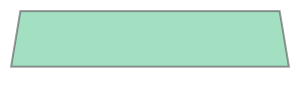

In [365]:
tree_maze.sub_segs['a']['a_0']


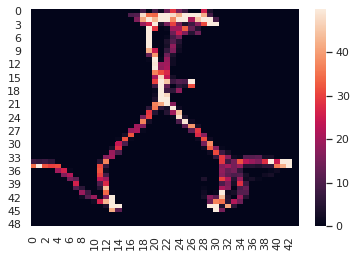

In [54]:
%%time
pos_zones_subsegs = pos_zones.copy()
for zo in tree_maze.linear_segs:
    segment_samps = np.where(pos_zones==zo)[0]
    zone_subsegs = tree_maze.sub_segs[zo]
    for sa in segment_samps:
        x = track_data.loc[sa,'x']
        y = track_data.loc[sa,'y']
        p = tmf.Point(x,y)
        for subseg_cnt, subseg_geom in enumerate(zone_subsegs):
            if subseg_geom.contains(p):
                pos_zones_subsegs[sa] = f"{zo}_{subseg_cnt}"
                break
                

CPU times: user 4.14 s, sys: 0 ns, total: 4.14 s
Wall time: 4.14 s


In [63]:
np.isin(pos_zones_subsegs[:20], [])

array([False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [60]:
)

dict_values([[(-250, -80), (-250, 80), (250, 80), (250, -80)], [(-80, 500), (-88, 450), (-150, 450), (-150, 600), (0, 700), (150, 600), (150, 450), (88, 450), (80, 500)], [(150, 80), (-150, 80), (-80, 500), (80, 500)], [(150, 600), (0, 700), (220, 990), (329, 900)], [(0, 700), (-150, 600), (-329, 900), (-220, 990)], [(560, 800), (520, 1180), (450, 1180), (329, 900)], [(450, 1260), (50, 1190), (220, 990), (450, 1180)], [(-50, 1190), (-450, 1260), (-450, 1180), (-220, 990)], [(-520, 1180), (-560, 800), (-329, 900), (-450, 1180)], [(520, 1180.5), (800, 1180.5), (800, 800), (560, 800)], [(50, 1190), (50, 1450), (450, 1450), (450, 1260)], [(-50, 1190), (-50, 1450), (-450, 1450), (-450, 1260)], [(-520, 1180.5), (-800, 1180.5), (-800, 800), (-560, 800)], [(220, 990), (450, 1180), (329, 900)], [(-329, 900), (-450, 1180), (-220, 990)]])

# Check Analyses method test on the SubjectSessionInfo Class

In [46]:
ei = reload(ei)
session = 'Li_OF_070618'
subject = session.split("_")[0]

session_info = ei.SubjectSessionInfo(subject,session)
print(session_info)


Session Information for subject Li, session Li_OF_070618
Number of curated units: 18
Methods listed below can be executed with get_{method}(), eg. get_spikes():
  -> track_data. Executed = True
  -> time. Executed = True
  -> spikes. Executed = True
  -> binned_spikes. Executed = True
  -> fr. Executed = True
  -> spike_maps. Executed = True
  -> maps. Executed = True
  -> scores. Executed = True
  -> encoding_models. Executed = True

To run all analyses use run_analyses().



In [63]:
import pandas as pd
cols = [k for k,v in session_info._analyses.items()]

c = pd.DataFrame(index=[session_info.session])
for k in cols:
    c[k] = session_info._analyses[k][1]
c

track_data  time  spikes  binned_spikes    fr  spike_maps  maps  \
Li_OF_070618        True  True    True           True  True        True  True   

              scores  encoding_models  
Li_OF_070618    True             True

In [61]:
a = a.append(c)

In [64]:
b

track_data  pos_zones  event_table  spikes  binned_spikes  \
Li_T3g_070518        True      False         True    True           True   

                 fr  spike_maps  maps  time  scores  encoding_models  
Li_T3g_070518  True        True  True  True    True             True

In [66]:
c.append(b)

track_data  time  spikes  binned_spikes    fr  spike_maps  \
Li_OF_070618         True  True    True           True  True        True   
Li_T3g_070518        True  True    True           True  True        True   

               maps  scores  encoding_models pos_zones event_table  
Li_OF_070618   True    True             True       NaN         NaN  
Li_T3g_070518  True    True             True     False        True

In [77]:
ei = reload(ei)
summary_in
subject_info = ei.SubjectInfo(subject, overwrite=True)

Error Computing Cluster Stats for Li_OF_052818


In [74]:
analyses_table = pd.DataFrame()
for session in subject_info.sessions:
    session_info = ei.SubjectSessionInfo(subject, session)
    analyses_table = analyses_table.append(session_info.analyses_table)
    

In [79]:
len(subject_info.analyses_table)

63